#                   **About Project and Data**

#   Project Title:

#     SmartLeaf:CNN-Based Mango Leaf Disease Prediction**

**Overview**:

Dive into the innovative world of plant pathology with SmartLeaf, your comprehensive guide to predicting mango leaf diseases using Convolutional Neural Networks (CNN). This notebook combines cutting-edge machine learning techniques with practical applications in agriculture, providing a robust framework for accurately identifying and diagnosing various diseases that affect mango leaves. From data preprocessing to model evaluation, SmartLeaf offers step-by-step instructions, detailed explanations, and insightful visualizations, making it an invaluable resource for researchers, students, and agricultural professionals aiming to leverage AI for healthier crops and improved yields. Join us in transforming the future of farming with technology-driven solutions.

**Dataset:**

LINK

**Approach:**

Data Preprocessing: Load and preprocess the orange leaf images. Normalize pixel values and augment the dataset to improve model generalization.

**Model Architecture:**

 Build a CNN architecture suitable for image classification. Utilize convolutional layers, pooling layers, and fully connected layers. Experiment with different architectures.

**Training and Validation**:

Split the dataset into training and validation sets. Train the CNN model using labeled images. Monitor training progress using loss and accuracy metrics.

**Evaluation**:

 Evaluate the trained model on a separate test set.

Predictions: Use the trained model to predict disease classes for unseen orange leaf images. Interpret model predictions and identify areas for improvement

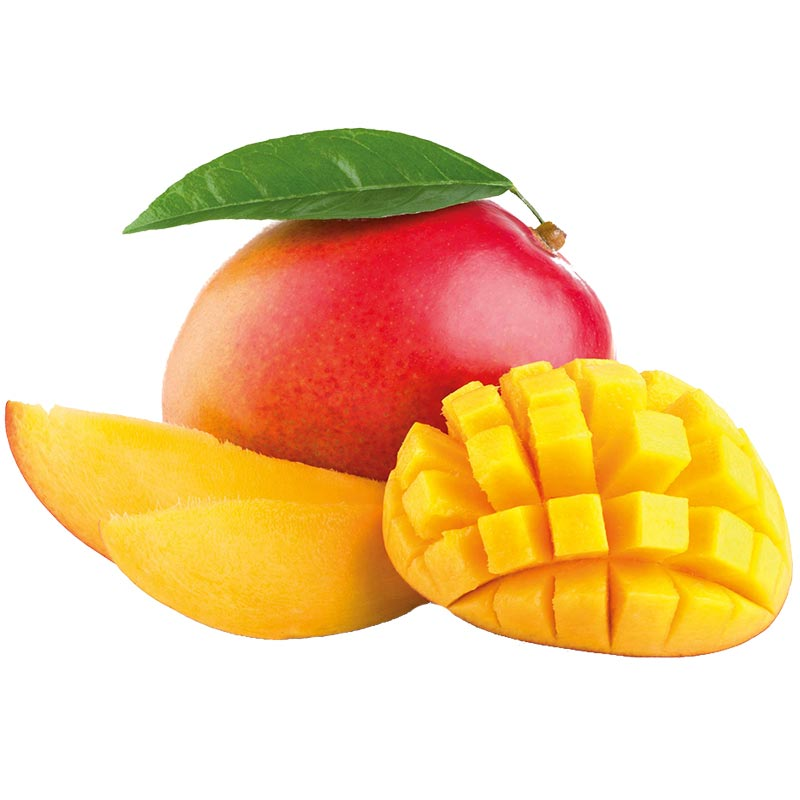

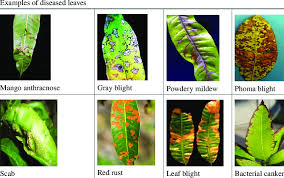

#                            Data processing

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries
import os
import random

In [ ]:


!unzip /content/archive_5.zip

Archive:  /content/archive_5.zip
  inflating: test.csv                
  inflating: test/Anthracnose/20211008_124305 (Custom).jpg  
  inflating: test/Anthracnose/20211008_124306 (Custom).jpg  
  inflating: test/Anthracnose/20211008_124341 (Custom).jpg  
  inflating: test/Anthracnose/20211008_124501 (Custom).jpg  
  inflating: test/Anthracnose/20211008_124931 (Custom).jpg  
  inflating: test/Anthracnose/20211008_124933 (Custom).jpg  
  inflating: test/Anthracnose/20211008_125014 (Custom).jpg  
  inflating: test/Anthracnose/20211008_125052 (Custom).jpg  
  inflating: test/Anthracnose/20211008_125112 (Custom).jpg  
  inflating: test/Anthracnose/20211011_131259 (Custom).jpg  
  inflating: test/Anthracnose/20211011_133431 (Custom).jpg  
  inflating: test/Anthracnose/20211011_133438 (Custom).jpg  
  inflating: test/Anthracnose/20211011_133815 (Custom).jpg  
  inflating: test/Anthracnose/20211011_134012 (Custom).jpg  
  inflating: test/Anthracnose/20211011_134403 (Custom).jpg  
  inflating: t

#Loading Image Dataset from Directory

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = r'/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 3200 files belonging to 8 classes.
Found 800 files belonging to 8 classes.


# Visualize the images

In [ ]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

In [ ]:
# Extrating the class labels
classes = train_ds.class_names

ANTHRACNOSE


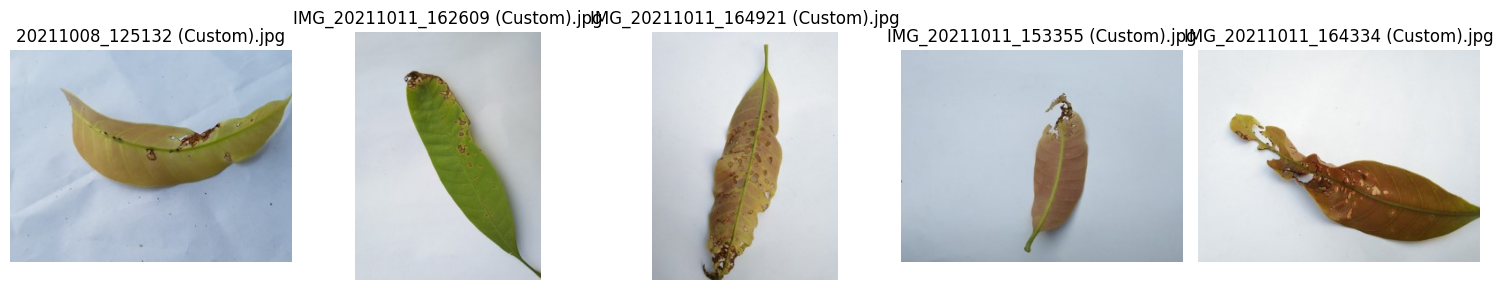

BACTERIAL CANKER


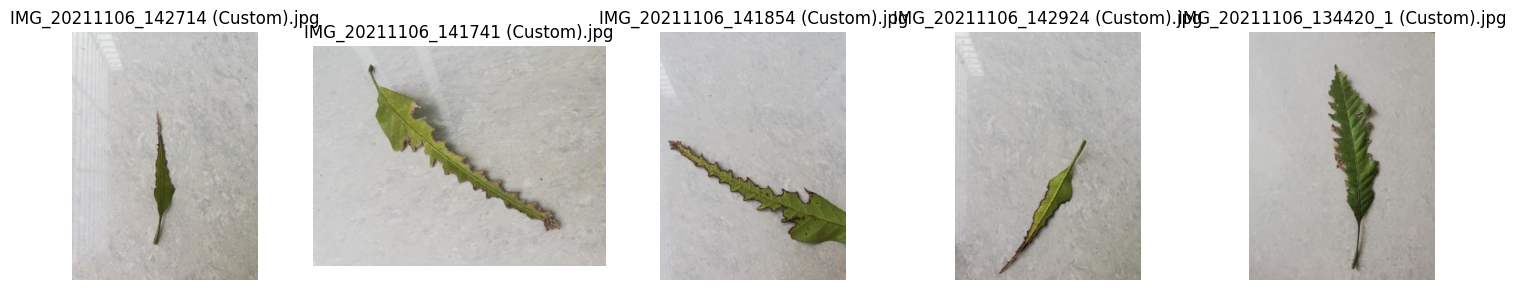

CUTTING WEEVIL


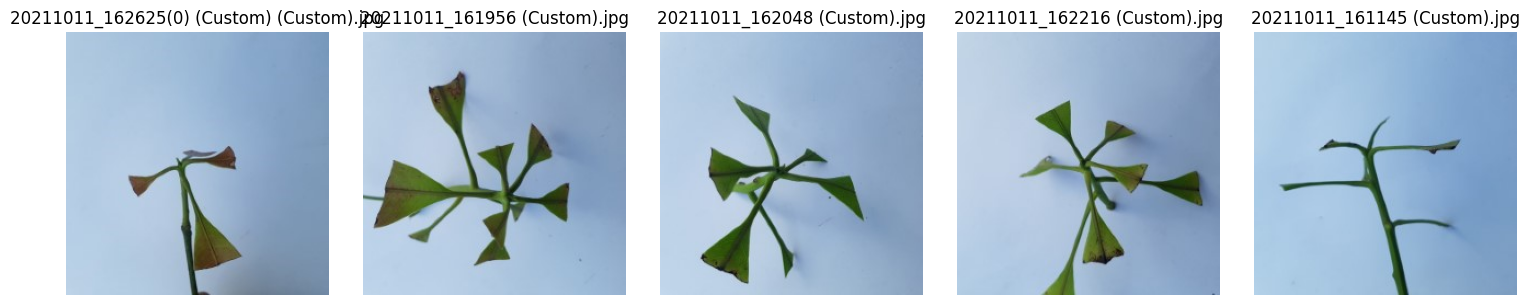

DIE BACK


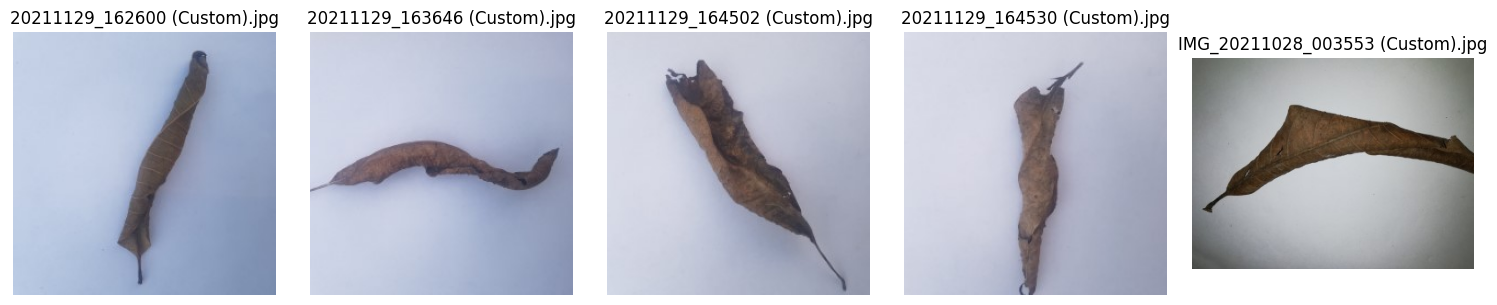

GALL MIDGE


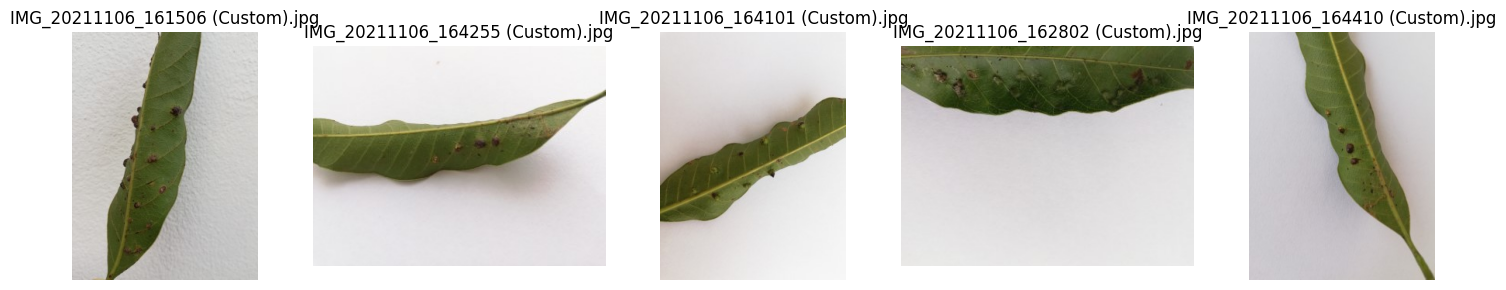

HEALTHY


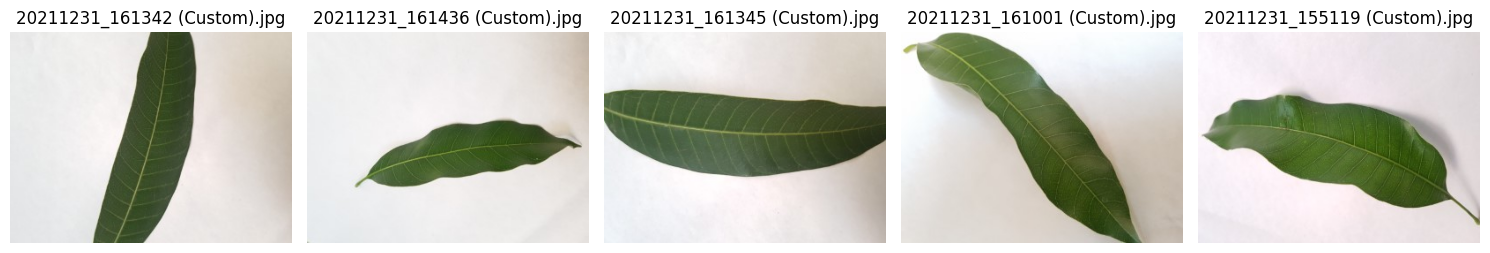

POWDERY MILDEW


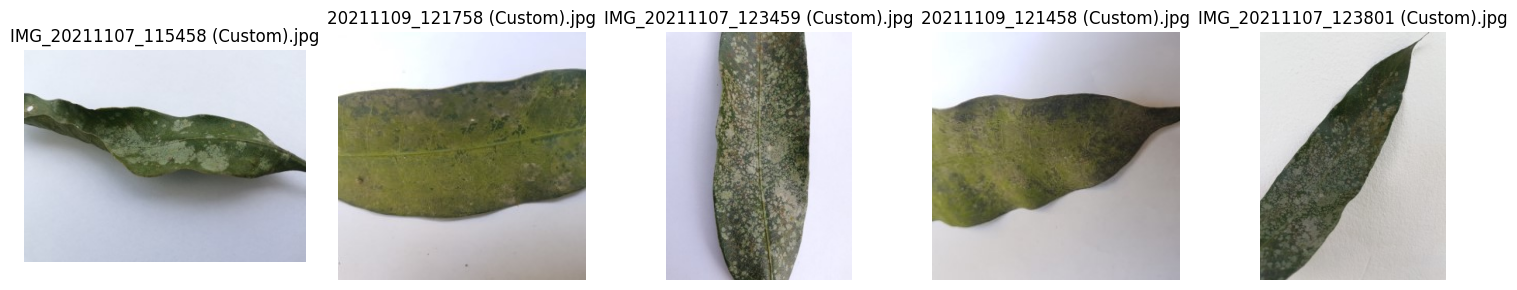

SOOTY MOULD


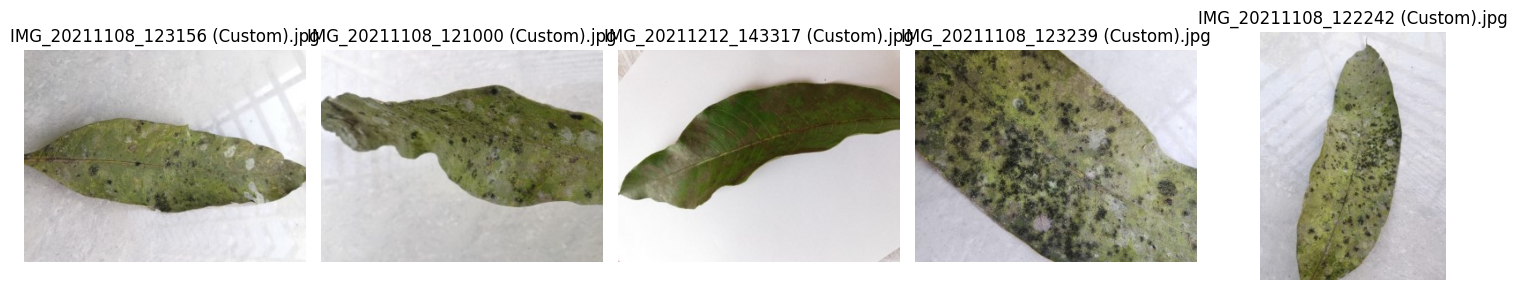

In [ ]:
# Iterating through each class to plot its images
for label in classes:

    # Specify the path containing the images to visualize
    path_to_visualize = f"/content/train/{label}"

    # Visualize 5 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=5)

# Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(8, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,320,024 (12.66 MB)

 Trainable params: 3,319,928 (12.66 MB)

 Non-trainable params: 96 (384.00 B)

#Model Compilation

In [ ]:


# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Training

In [13]:


# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.9781 - loss: 0.0758 - val_accuracy: 0.6313 - val_loss: 2.1144
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.9775 - loss: 0.0613 - val_accuracy: 0.9100 - val_loss: 0.4048
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.9845 - loss: 0.0461 - val_accuracy: 0.6538 - val_loss: 2.0444
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.9736 - loss: 0.0991 - val_accuracy: 0.6850 - val_loss: 2.3306
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 382s 4s/step - accuracy: 0.9791 - loss: 0.0573 - val_accuracy: 0.9025 - val_loss: 0.4244
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.9744 - loss: 0.0787 - val_accuracy: 0.7900 - val_loss: 1.2530
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 378s 4s/step - accuracy: 0.9744 - loss: 0.0668 - val_accuracy: 0.8138 - val_loss: 0.8194
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 363s 4s/step - accuracy: 0.9784 - loss: 0.0764 - val_accu

#Plotting the Graphs of Accuracy and Loss

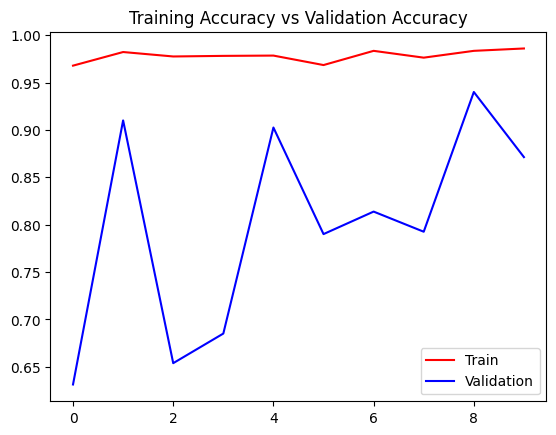

In [14]:
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

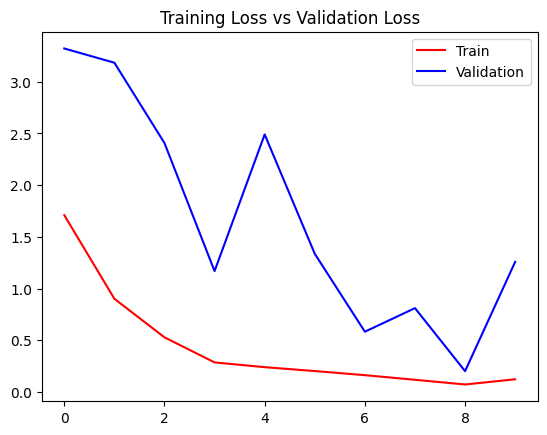

In [ ]:
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()

In [15]:
#  save the model

model.save('my_model.h5')

In [16]:
from tensorflow.keras.models import load_model

# Load your saved model
model = load_model('/content/my_model.h5')


In [18]:


!pip install gradio



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7


In [22]:
import gradio as gr
from PIL import Image
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('/content/my_model.h5')  # replace with your model path

# Define the classes
disease_classes = ['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back',
                   'Gall Midges', 'Healthy', 'Powdery Mildew', 'Sooty Mold']

# Define the prediction function
def predict_disease(image):
    # Resize the image to match the input shape expected by the model
    image = image.resize((256, 256))  # Adjust based on your model input size
    # Convert image to array and normalize
    image_array = tf.keras.preprocessing.image.img_to_array(image) / 255.0
    # Expand dimensions to make it compatible with model input
    image_array = tf.expand_dims(image_array, 0)
    # Make a prediction
    predictions = model.predict(image_array)
    # Get the index of the highest probability
    predicted_index = tf.argmax(predictions[0]).numpy()
    # Get the corresponding class name
    return disease_classes[predicted_index]

# Create the Gradio interface
gr_interface = gr.Interface(
    fn=predict_disease,  # Prediction function
    inputs=gr.Image(type="pil"),  # Use PIL image input directly
    outputs="label",  # Output a label for prediction
    title="Mango Leaf Disease Classifier",
    description="Upload an image of a mango leaf to detect the disease type."
)

# Launch the interface
gr_interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://99932e282cf8b69aa5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 1. Project Overview
#	Objective:
Predict and classify diseases in mango leaves using a Convolutional Neural Network (CNN).
##  Significance:
Accurate disease prediction helps in early intervention, ensuring healthier crops and improved agricultural yields.
##Target Audience:
Researchers, agricultural professionals, and students interested in AI applications in agriculture.
________________________________________
## 2.Dataset and Preprocessing
## •	Dataset Details:
o	Mango leaf images, categorized by disease type.
o	Split into training, validation, and test sets.
##•	Preprocessing Steps:
o	Image resizing and normalization.
o	Data augmentation (rotation, flipping) to enhance model generalization.
________________________________________
##3. Model Architecture
 ## CNN Layers:

 Convolutional layers to capture features like color, texture, and patterns in leaves.

 Pooling layers for dimensionality reduction, improving computational efficiency.

 Fully connected layers for classification.
## Hyperparameter Tuning:

Optimized layers, filter sizes, and dropout rates to prevent overfitting.
________________________________________



## 4. Training and Validation Results

•	Training Progress (10 Epochs):
Epoch	Training Accuracy	Training Loss	Validation Accuracy	Validation Loss

1	26.17%	2.1881	22.12%	3.3209
2	61.13%	1.0687	39.13%	3.1832
3	77.72%	0.6443	53.37%	2.4067
4	89.04%	0.3148	69.25%	1.1691
5	92.66%	0.2363	57.00%	2.4898
6	91.99%	0.2174	76.00%	1.3362
7	95.60%	0.1264	83.13%	0.5830
8	95.44%	0.1357	78.62%	0.8111
9	97.78%	0.0655	93.25%	0.2018
10	97.21%	0.0994	73.37%	1.2582


## Key Observations:

Training accuracy improved steadily, reaching 97.21% by epoch 10.

Validation accuracy saw fluctuations, peaking at 93.25% at epoch 9, showing potential for fine-tuning.

Some overfitting is indicated as validation loss rises after epoch 7.
________________________________________
## 5. Model Evaluation and Final Results
### •	Evaluation on Test Set:

The model was tested on unseen data to assess its generalization ability.
###	Performance Metrics:
Accuracy: 93.25% (Peak during validation)

 Loss: Indicates room for optimization, especially for reducing overfitting.
________________________________________

##6. Key Takeaways and Next Steps
##	Achievements:
SmartLeaf demonstrates high potential for practical applications in agriculture by identifying mango leaf diseases with high accuracy.
## Challenges:
Slight overfitting observed; potential improvement through regularization and more diverse data.
## Future Work:
Experiment with transfer learning using pre-trained models, which could enhance the model’s accuracy and robustness.
________________________________________
#7. Conclusion

Smart Leaf effectively combines deep learning with agriculture, providing a promising solution to support farmers and agricultural specialists in monitoring plant health. With further refinements, this model can become a valuable tool in crop disease management, contributing to sustainable and technology-driven farming practices.


# Deployment on Hugging Face

## https://huggingface.co/spaces/Rumana85/mango-leaf-diseases

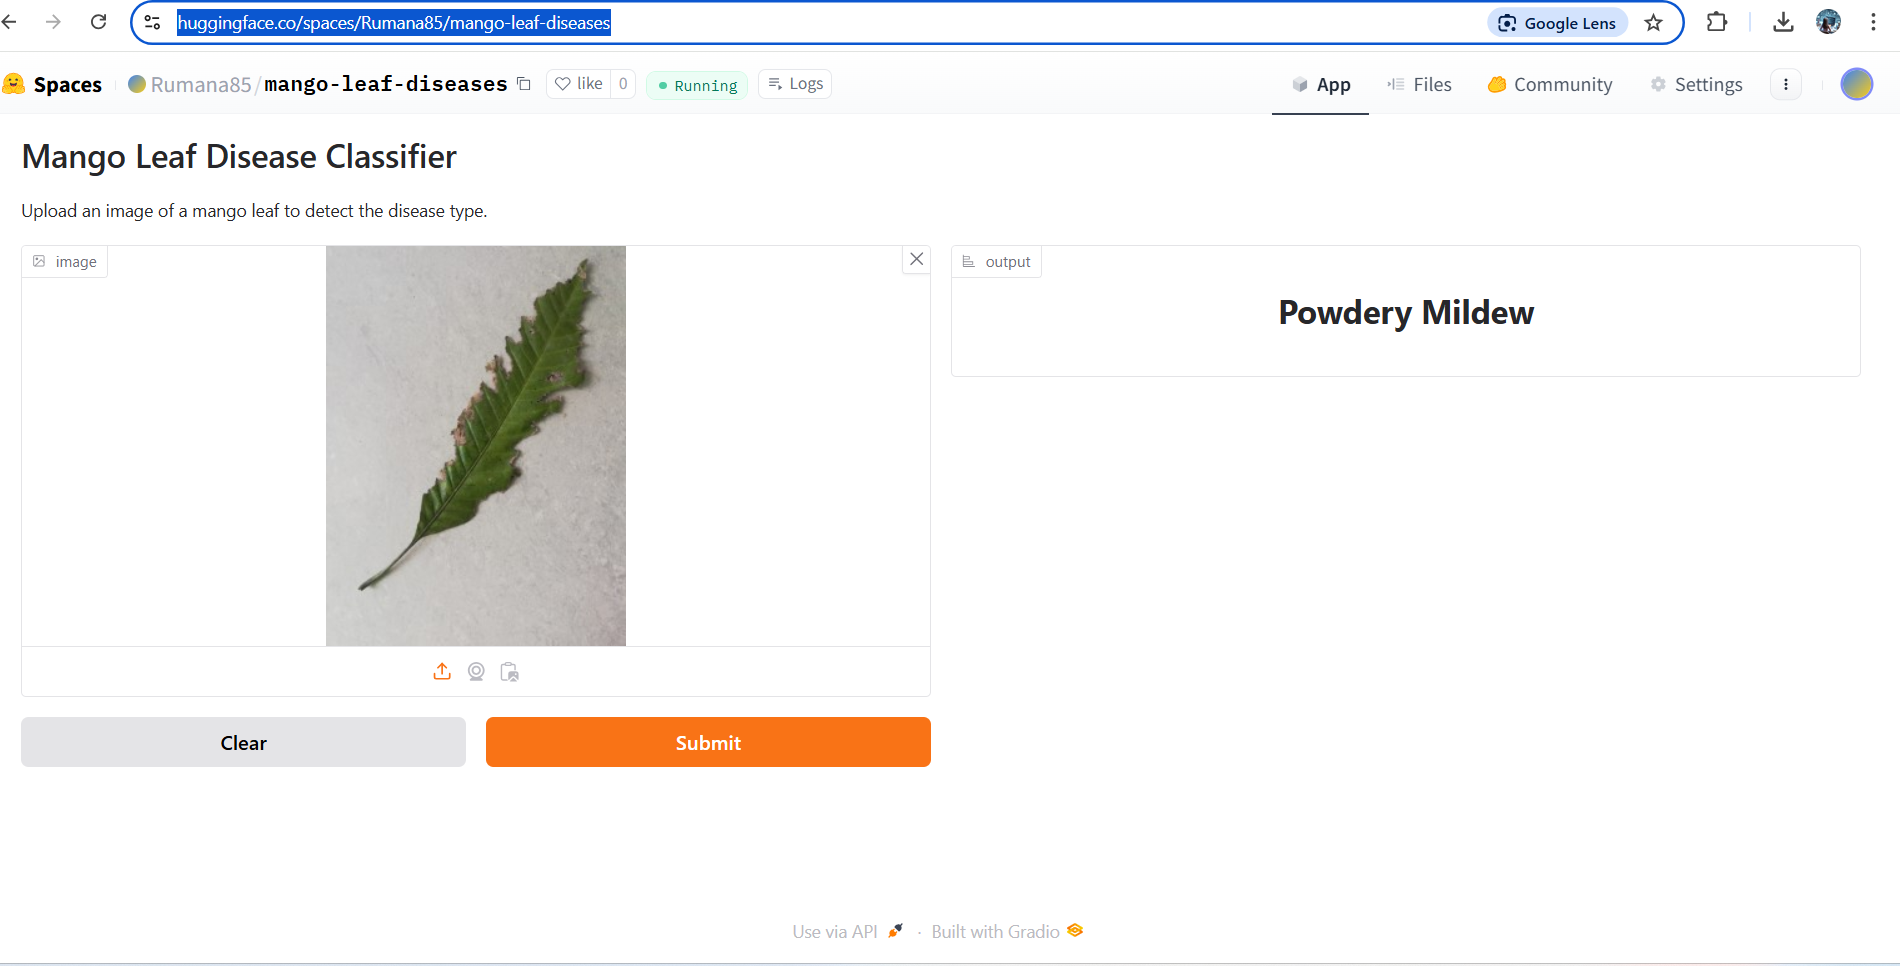